In [72]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [74]:
plt.style.use('paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches

In [75]:
lgMh_s0_mat = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["mass"]

lgMh_s15_mat = np.load("../../../data/cross_host/lognorm_015_psi3/models.npz")["mass"]

lgMh_s30_mat = np.load("../../../data/cross_host/lognorm_030_psi3/models.npz")["mass"]

In [76]:
Nsamp = 27

lgMh_acc_surv = np.vstack(lgMh_s30_mat)
Nsets = int(lgMh_acc_surv.shape[0]/Nsamp)

snip = lgMh_acc_surv.shape[0]%Nsamp
if snip != 0.0:
    print("Cannot evenly divide your sample by the number of samples!")
    lgMh_snip = np.delete(lgMh_acc_surv, np.arange(snip), axis=0)
    Nsets = int(lgMh_snip.shape[0]/Nsamp) #dividing by the number of samples
    print("dividing your sample into", Nsets, "sets.", snip, "trees were discarded")
    new_mat = np.array(np.split(lgMh_snip, Nsets, axis=0))

Cannot evenly divide your sample by the number of samples!
dividing your sample into 370 sets. 10 trees were discarded


In [77]:
def covariance(mass_2D, min, max, Nbins):

    mass_bins = np.linspace(min, max, Nbins)
    N_ij = np.apply_along_axis(jsm_stats.count, 1, mass_2D, mass_bins) 
    C_ij = np.abs(np.cov(N_ij.T)) # lets just take the absolute value so that the logspace images don't come out all noisy!
    # numerator = np.sum([np.sum(np.diagonal(C_ij, offset=i)) for i in range(1, Nbins)]) # this iterates over the offsets of the diagonal and sums everything!
    # denominator = C_ij.trace()
    # Qstat = numerator/denominator
    return C_ij, mass_bins

#### the covariance in the SHMFs

In [78]:
Mh_min = 9.2
Mh_max = 12.5
Nbins = 26

C_s0, mass_bins = covariance(np.vstack(lgMh_s0_mat), Mh_min, Mh_max, Nbins)

C_s15, _ = covariance(np.vstack(lgMh_s15_mat), Mh_min, Mh_max, Nbins)

C_s30, _ = covariance(np.vstack(lgMh_s30_mat), Mh_min, Mh_max, Nbins)

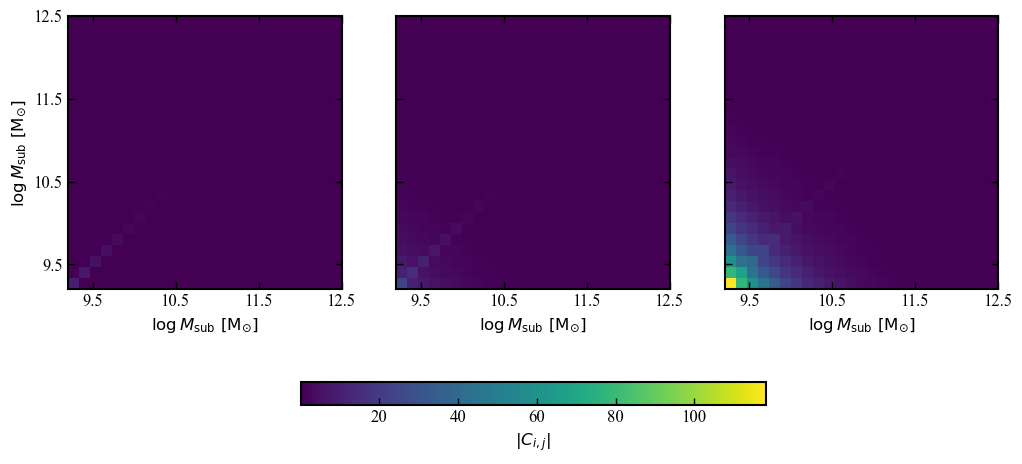

In [79]:
N_max = C_s30.max()
N_min = C_s30.min()

cmap = cm.get_cmap('viridis')
normalizer = Normalize(N_min, N_max)
im = cm.ScalarMappable(norm=normalizer, cmap=cmap)

fig, axs=plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(12, 8))

axs[0].imshow(C_s0, extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max,  origin="lower")
axs[1].imshow(C_s15, extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")
axs[2].imshow(C_s30, extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")

axs[0].set_aspect(1/axs[0].get_data_ratio(), adjustable="box")
axs[1].set_aspect(1/axs[1].get_data_ratio(), adjustable="box")
axs[2].set_aspect(1/axs[2].get_data_ratio(), adjustable="box")

axs[0].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_ylabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[1].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[2].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_xticks([9.5, 10.5, 11.5, 12.5]) 
axs[0].set_yticks([9.5, 10.5, 11.5, 12.5]) 

cm_test = fig.colorbar(im, ax=axs.ravel().tolist(), orientation="horizontal", shrink=0.5)
cm_test.set_label("$|C_{i,j}|$")
plt.show()

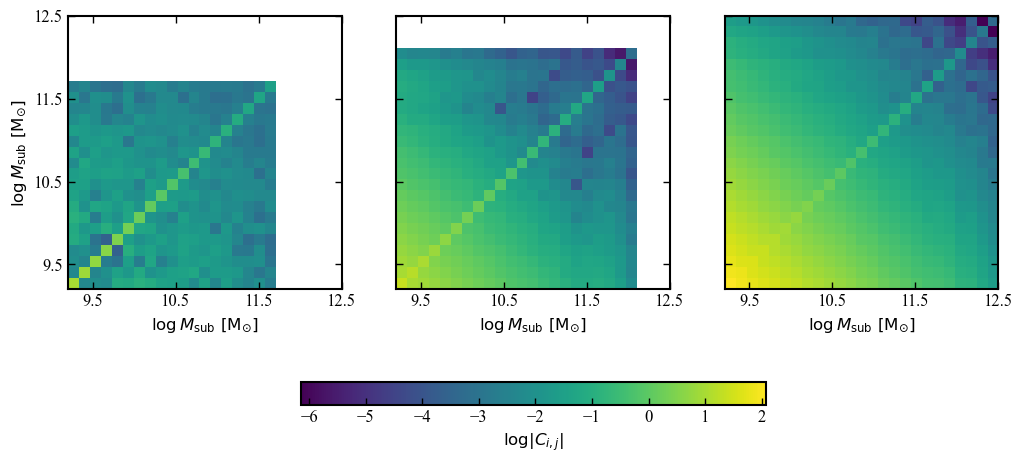

In [80]:
N_max = np.log10(C_s30.max())
N_min = np.log10(C_s30.min())

cmap = cm.get_cmap('viridis')
normalizer = Normalize(N_min, N_max)
im = cm.ScalarMappable(norm=normalizer, cmap=cmap)

fig, axs=plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(12, 8))

axs[0].imshow(np.log10(C_s0), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max,  origin="lower")
axs[1].imshow(np.log10(C_s15), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")
axs[2].imshow(np.log10(C_s30), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")

axs[0].set_aspect(1/axs[0].get_data_ratio(), adjustable="box")
axs[1].set_aspect(1/axs[1].get_data_ratio(), adjustable="box")
axs[2].set_aspect(1/axs[2].get_data_ratio(), adjustable="box")

axs[0].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_ylabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[1].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[2].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_xticks([9.5, 10.5, 11.5, 12.5]) 
axs[0].set_yticks([9.5, 10.5, 11.5, 12.5]) 

cm_test = fig.colorbar(im, ax=axs.ravel().tolist(), orientation="horizontal", shrink=0.5)
cm_test.set_label("$\log |C_{i,j}|$")
plt.show()

#### now lets convert to stellar mass and look at the covariance in the SMFs

In [89]:
new_mat.shape

(370, 27, 2499)

In [90]:
lgMh_s30_mat.shape

(100, 100, 2499)

In [91]:
min_mass = 6.5
max_mass = 11.5
theta_fid = [10.5, 2.0, 0.0, 0.0, 0.0, 0.0]

C_s0_mstar, mass_bins = covariance(jsm_SHMR.general_new(theta_fid, np.vstack(lgMh_s0_mat), 0.0, 1.0), min_mass, max_mass, Nbins)

C_s15_mstar, _ = covariance(jsm_SHMR.general_new(theta_fid, np.vstack(lgMh_s30_mat), 0.0, 1.0), min_mass, max_mass, Nbins)

C_s30_mstar, _ = covariance(jsm_SHMR.general_new(theta_fid, np.vstack(new_mat), 0.0, 1.0), min_mass, max_mass, Nbins)

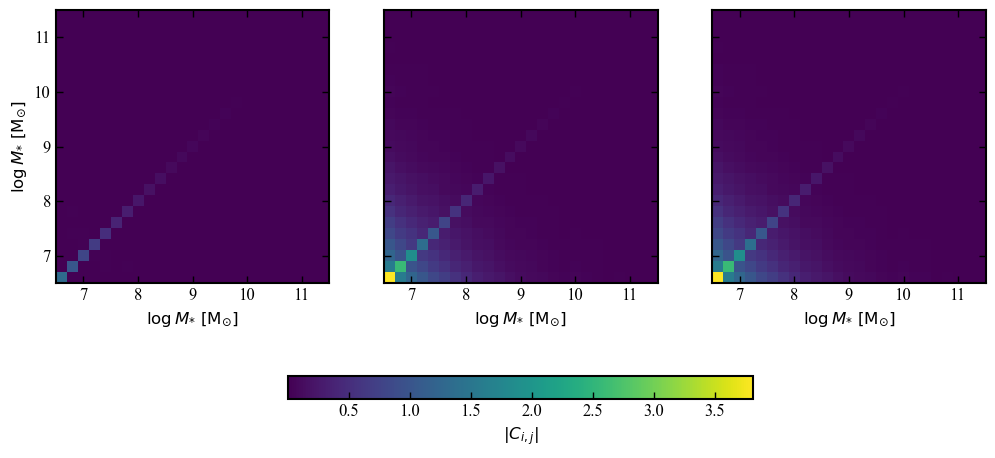

In [92]:
N_max = C_s30_mstar.max()
N_min = C_s30_mstar.min()

cmap = cm.get_cmap('viridis')
normalizer = Normalize(N_min, N_max)
im = cm.ScalarMappable(norm=normalizer, cmap=cmap)

fig, axs=plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(12, 8))

axs[0].imshow(C_s0_mstar, extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max,  origin="lower")
axs[1].imshow(C_s15_mstar, extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")
axs[2].imshow(C_s30_mstar, extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")

axs[0].set_aspect(1/axs[0].get_data_ratio(), adjustable="box")
axs[1].set_aspect(1/axs[1].get_data_ratio(), adjustable="box")
axs[2].set_aspect(1/axs[2].get_data_ratio(), adjustable="box")

axs[0].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_ylabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[1].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[2].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_xticks([7, 8, 9, 10, 11]) 
axs[0].set_yticks([7, 8, 9, 10, 11]) 

cm_test = fig.colorbar(im, ax=axs.ravel().tolist(), orientation="horizontal", shrink=0.5)
cm_test.set_label("$|C_{i,j}|$")
plt.show()

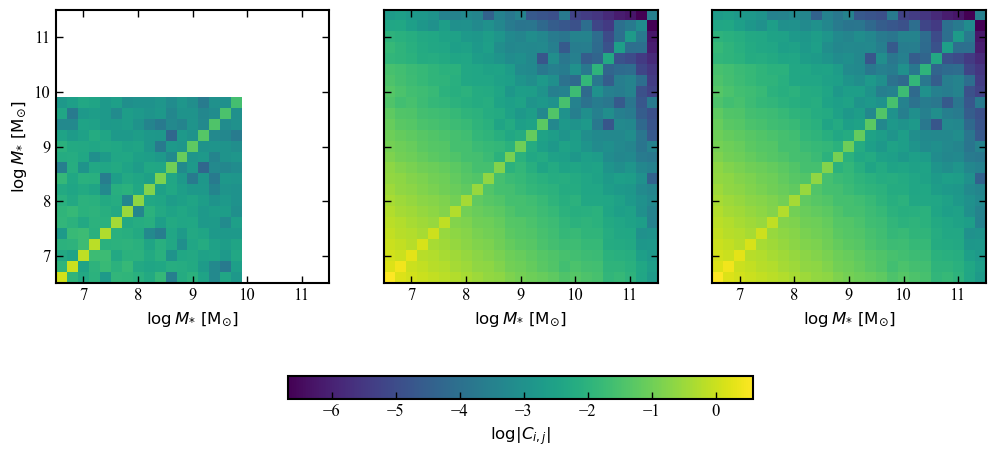

In [93]:
N_max = np.log10(C_s30_mstar.max())
N_min = np.log10(C_s30_mstar.min())

cmap = cm.get_cmap('viridis')
normalizer = Normalize(N_min, N_max)
im = cm.ScalarMappable(norm=normalizer, cmap=cmap)

fig, axs=plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(12, 8))

axs[0].imshow(np.log10(C_s0_mstar), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max,  origin="lower")
axs[1].imshow(np.log10(C_s15_mstar), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")
axs[2].imshow(np.log10(C_s30_mstar), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")

axs[0].set_aspect(1/axs[0].get_data_ratio(), adjustable="box")
axs[1].set_aspect(1/axs[1].get_data_ratio(), adjustable="box")
axs[2].set_aspect(1/axs[2].get_data_ratio(), adjustable="box")

axs[0].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_ylabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[1].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[2].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_xticks([7, 8, 9, 10, 11]) 
axs[0].set_yticks([7, 8, 9, 10, 11]) 

cm_test = fig.colorbar(im, ax=axs.ravel().tolist(), orientation="horizontal", shrink=0.5)
cm_test.set_label("$\log |C_{i,j}|$")
plt.show()

#### finally, the covariance in the stacked SMF

In [94]:
def NADLER_cov(lgMh_mat, theta=theta_fid):
    Nbins = 26

    lgMs_mat = np.apply_along_axis(jsm_SHMR.general_new, 0, theta, lgMh_mat, 0.0, 1.0)
    N_ij = np.zeros(shape=(lgMh_mat.shape[0], Nbins-1))

    for ind, realization in enumerate(lgMs_mat):
        stat_i = jsm_stats.SatStats_D_NADLER(realization, min_mass, max_mass, Nbins)
        N_ij[ind] = stat_i.stack
    C_ij = np.abs(np.cov(N_ij.T))
    return C_ij, N_ij, stat_i.bin_centers

In [95]:
C_s0_stacked, test_0, centers = NADLER_cov(lgMh_s0_mat)

C_s15_stacked, test_15, _ = NADLER_cov(lgMh_s15_mat)

C_s30_stacked, test_30, _ = NADLER_cov(lgMh_s30_mat)

In [96]:
new_stack_C, new_stack, centers = NADLER_cov(new_mat)

In [101]:
def neighbors(sample, bincenters, index):
    for i in range(100):
        plt.step(bincenters, sample[i], color="grey", alpha=0.2, where="mid")
    plt.axvline(bincenters[index], color="k", ls="--")
    plt.xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
    plt.ylabel("N stacked")
    plt.yscale("log")
    plt.show()

    array = sample[:, index]
    plt.title(f"mass bin = {bincenters[index]:.2f} (log Mstar)")
    plt.hist(array, bins=np.linspace(array.min(), array.max(), 15), edgecolor="white", color="steelblue")
    Ncut = np.percentile(sample[:, index], 90)
    plt.axvline(Ncut, color="firebrick", ls="--")
    mask = np.where(array > Ncut)[0]
    plt.hist(array[mask], bins=np.linspace(array.min(), array.max(), 15), edgecolor="white", color="firebrick")
    np.where(array > Ncut)[0]
    plt.xlabel("$N_{sat}$ stacked")
    plt.ylim(0, 100)
    plt.ylabel("frequency")
    plt.show()

    offset = 1
    new_array = sample[:, index+offset]

    plt.title(f"mass bin = {centers[index+offset]:.2f} (log Mstar)")
    plt.hist(new_array, bins=np.linspace(new_array.min(), new_array.max(), 15), edgecolor="white", color="steelblue")
    plt.hist(new_array[mask], bins=np.linspace(new_array.min(), new_array.max(), 15), edgecolor="white", color="firebrick")
    np.where(sample[:, 10] > Ncut)[0]
    plt.xlabel("$N_{sat}$ stacked")
    plt.ylim(0, 100)
    plt.ylabel("frequency")
    plt.show()

    offset = -1
    new_array = sample[:, index+offset]

    plt.title(f"mass bin = {centers[index+offset]:.2f} (log Mstar)")
    plt.hist(new_array, bins=np.linspace(new_array.min(), new_array.max(), 15), edgecolor="white", color="steelblue")
    plt.hist(new_array[mask], bins=np.linspace(new_array.min(), new_array.max(), 15), edgecolor="white", color="firebrick")
    np.where(sample[:, 10] > Ncut)[0]
    plt.xlabel("$N_{sat}$ stacked")
    plt.ylim(0, 100)
    plt.ylabel("frequency")
    plt.show()

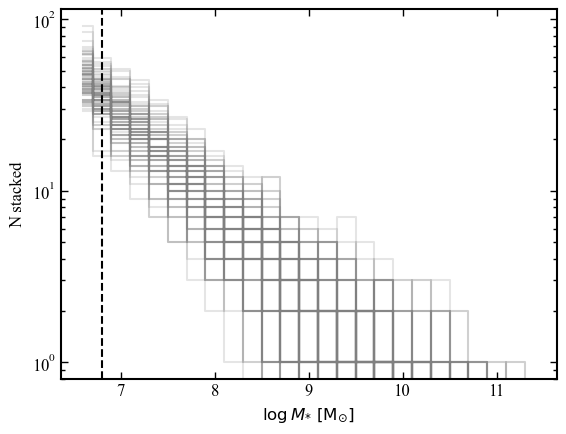

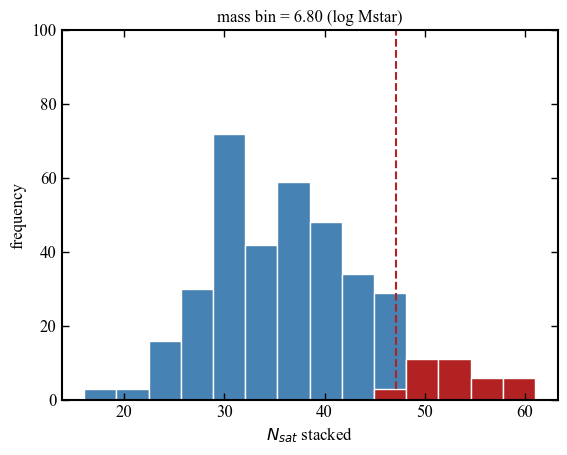

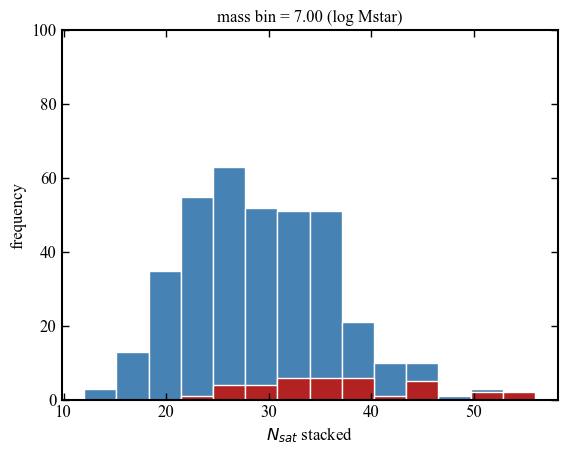

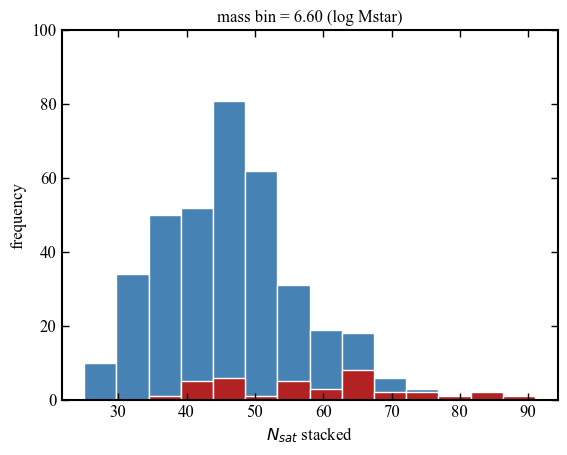

In [102]:
neighbors(new_stack, centers, 1)

In [ ]:
N_max = C_s30_stacked.max()
N_min = C_s30_stacked.min()

cmap = cm.get_cmap('viridis')
normalizer = Normalize(N_min, N_max)
im = cm.ScalarMappable(norm=normalizer, cmap=cmap)

fig, axs=plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(12, 8))

axs[0].imshow(C_s0_stacked, extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max,  origin="lower")
axs[1].imshow(C_s15_stacked, extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")
axs[2].imshow(C_s30_stacked, extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")

axs[0].set_aspect(1/axs[0].get_data_ratio(), adjustable="box")
axs[1].set_aspect(1/axs[1].get_data_ratio(), adjustable="box")
axs[2].set_aspect(1/axs[2].get_data_ratio(), adjustable="box")

axs[0].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_ylabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[1].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[2].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_xticks([7, 8, 9, 10, 11]) 
axs[0].set_yticks([7, 8, 9, 10, 11]) 

cm_test = fig.colorbar(im, ax=axs.ravel().tolist(), orientation="horizontal", shrink=0.5)
cm_test.set_label("$|C_{i,j}|$")
plt.show()

In [ ]:
N_max = np.log10(C_s30_stacked.max())
N_min = np.log10(C_s30_stacked.min())

cmap = cm.get_cmap('viridis')
normalizer = Normalize(N_min, N_max)
im = cm.ScalarMappable(norm=normalizer, cmap=cmap)

fig, axs=plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(12, 8))

axs[0].imshow(np.log10(C_s0_stacked), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max,  origin="lower")
axs[1].imshow(np.log10(C_s15_stacked), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")
axs[2].imshow(np.log10(C_s30_stacked), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap=cmap, vmin=N_min, vmax=N_max, origin="lower")

axs[0].set_aspect(1/axs[0].get_data_ratio(), adjustable="box")
axs[1].set_aspect(1/axs[1].get_data_ratio(), adjustable="box")
axs[2].set_aspect(1/axs[2].get_data_ratio(), adjustable="box")

axs[0].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_ylabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[1].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[2].set_xlabel("$\log M_{\mathrm{*}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_xticks([7, 8, 9, 10, 11]) 
axs[0].set_yticks([7, 8, 9, 10, 11]) 

cm_test = fig.colorbar(im, ax=axs.ravel().tolist(), orientation="horizontal", shrink=0.5)
cm_test.set_label("$\log |C_{i,j}|$")
plt.show()